In [1]:
import pandas as pd
data = pd.read_excel("pandas-learning.xlsx") #读取excel
print(data)

                     日期  PH  DP  CODMn  NH3-H
0                 37773   1   2      3      4
1                 37803   5   6      7      8
2                 37834   9   0      1      1
3                 37865   2   3      4      5
4                 37895   6   7      8      9
5                 37926   2   6      4      2
6                 37956   3   5      4      4
7               2004年1月   3   3      4      5
8   2004-02-01 00:00:00   4   4      5      2
9   2004-03-01 00:00:00   8   4      2      3
10  2004-04-01 00:00:00   5   3      5      4
11  2004-05-01 00:00:00   6   3      1      4
12  2004-06-01 00:00:00   7   3      6      5
13  2004-07-01 00:00:00   9   3      2      1


In [19]:
import pandas as pd
data = pd.read_excel("pandas-learning.xlsx") #读取excel
data = data.drop('日期',axis=1) #去掉日期列
data

,PH,DP,CODMn,NH3-H
0,1,2,3,4
1,5,6,7,8
2,9,0,1,1
3,2,3,4,5
4,6,7,8,9
5,2,6,4,2
6,3,5,4,4
7,3,3,4,5
8,4,4,5,2
9,8,4,2,3


In [7]:

data.drop_duplicates() #去除重复的数据，两行重复只保留一行
data.head() #输出前几行


,PH,DP,CODMn,NH3-H
0,1,2,3,4
1,5,6,7,8
2,9,0,1,1
3,2,3,4,5
4,6,7,8,9


In [8]:
data.set_index(data['PH']) #把PH字段设置成索引

,PH,DP,CODMn,NH3-H
PH,,,,
1,1,2,3,4
5,5,6,7,8
9,9,0,1,1
2,2,3,4,5
6,6,7,8,9
2,2,6,4,2
3,3,5,4,4
3,3,3,4,5
4,4,4,5,2


In [21]:
data.columns  #查看表头，列名

data['PH']   # 取一列数据

#取一列数据然后排序
data['PH'].sort_values()

data['level'] = [0,1,2,3,4,5,6,7,8,9,1,1,1,1] #增加一列

data['level'].value_counts() #统计 level列每一个元素的个数，返回一个字典

print(data['level'].value_counts().keys())  # 取出统计元素的keys
print(data['level'].value_counts().values)  # 取出统计元素的value


Int64Index([1, 0, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')
[5 1 1 1 1 1 1 1 1 1]


In [22]:
#取某一行的数据
data.iloc[5]


PH       2
DP       6
CODMn    4
NH3-H    2
level    5
Name: 5, dtype: int64

In [24]:
#dataframe里面的数可以直接操作
# 将数据归约
(data -data.min()) / (data.max() - data.min())


,PH,DP,CODMn,NH3-H,level
0,0.000,0.285714,0.285714,0.375,0.000000
1,0.500,0.857143,0.857143,0.875,0.111111
2,1.000,0.000000,0.000000,0.000,0.222222
3,0.125,0.428571,0.428571,0.500,0.333333
4,0.625,1.000000,1.000000,1.000,0.444444
5,0.125,0.857143,0.428571,0.125,0.555556
6,0.250,0.714286,0.428571,0.375,0.666667
7,0.250,0.428571,0.428571,0.500,0.777778
8,0.375,0.571429,0.571429,0.125,0.888889
9,0.875,0.571429,0.142857,0.250,1.000000


In [25]:
#统计每一组数据的信息
data.describe()

,PH,DP,CODMn,NH3-H,level
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,5.000000,3.714286,4.000000,4.071429,3.500000
std,2.631174,1.815683,2.112235,2.335818,3.006403
min,1.000000,0.000000,1.000000,1.000000,0.000000
25%,3.000000,3.000000,2.250000,2.250000,1.000000
50%,5.000000,3.000000,4.000000,4.000000,2.500000
75%,6.750000,4.750000,5.000000,5.000000,5.750000
max,9.000000,7.000000,8.000000,9.000000,9.000000


In [27]:
#计算每两个属性的相关系数
data.corr()


,PH,DP,CODMn,NH3-H,level
PH,6.923077,-1.153846,-1.384615,-1.307692,-0.923077
DP,-1.153846,3.296703,2.615385,2.406593,1.692308
CODMn,-1.384615,2.615385,4.461538,3.769231,0.076923
NH3-H,-1.307692,2.406593,3.769231,5.456044,-0.961538
level,-0.923077,1.692308,0.076923,-0.961538,9.038462


In [28]:

#计算属性间的协方差
data.cov()


,PH,DP,CODMn,NH3-H,level
PH,6.923077,-1.153846,-1.384615,-1.307692,-0.923077
DP,-1.153846,3.296703,2.615385,2.406593,1.692308
CODMn,-1.384615,2.615385,4.461538,3.769231,0.076923
NH3-H,-1.307692,2.406593,3.769231,5.456044,-0.961538
level,-0.923077,1.692308,0.076923,-0.961538,9.038462


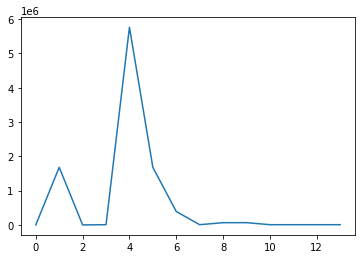

    PH       DP  CODMn  NH3-H  level             DP2
0    1      256      3      4      0           65536
1    5  1679616      7      8      1   2821109907456
2    9        0      1      1      2               0
3    2     6561      4      5      3        43046721
4    6  5764801      8      9      4  33232930569601
5    2  1679616      4      2      5   2821109907456
6    3   390625      4      4      6    152587890625
7    3     6561      4      5      7        43046721
8    4    65536      5      2      8      4294967296
9    8    65536      2      3      9      4294967296
10   5     6561      5      4      1        43046721
11   6     6561      1      4      1        43046721
12   7     6561      6      5      1        43046721
13   9     6561      2      1      1        43046721


In [42]:
import matplotlib.pyplot as plt
data['DP'].plot()  #panda数据联动画图
plt.show()

In [40]:

# DP列数据下移一位  适合做时间序列的回归
data['DP'].shift(1)
# DP列数据 上  移一位  适合做时间序列的回归
data['DP'].shift(-1)

    PH       DP  CODMn  NH3-H  level             DP2
0    1      256      3      4      0           65536
1    5  1679616      7      8      1   2821109907456
2    9        0      1      1      2               0
3    2     6561      4      5      3        43046721
4    6  5764801      8      9      4  33232930569601
5    2  1679616      4      2      5   2821109907456
6    3   390625      4      4      6    152587890625
7    3     6561      4      5      7        43046721
8    4    65536      5      2      8      4294967296
9    8    65536      2      3      9      4294967296
10   5     6561      5      4      1        43046721
11   6     6561      1      4      1        43046721
12   7     6561      6      5      1        43046721
13   9     6561      2      1      1        43046721


0     1679616.0
1           0.0
2        6561.0
3     5764801.0
4     1679616.0
5      390625.0
6        6561.0
7       65536.0
8       65536.0
9        6561.0
10       6561.0
11       6561.0
12       6561.0
13          NaN
Name: DP, dtype: float64

In [39]:
print(data)
# 某一列所有数据进行 一个函数计算
data['DP2'] = data['DP'].apply(lambda x : x**2)
data

    PH       DP  CODMn  NH3-H  level             DP2
0    1      256      3      4      0           65536
1    5  1679616      7      8      1   2821109907456
2    9        0      1      1      2               0
3    2     6561      4      5      3        43046721
4    6  5764801      8      9      4  33232930569601
5    2  1679616      4      2      5   2821109907456
6    3   390625      4      4      6    152587890625
7    3     6561      4      5      7        43046721
8    4    65536      5      2      8      4294967296
9    8    65536      2      3      9      4294967296
10   5     6561      5      4      1        43046721
11   6     6561      1      4      1        43046721
12   7     6561      6      5      1        43046721
13   9     6561      2      1      1        43046721


,PH,DP,CODMn,NH3-H,level,DP2
0,1,256,3,4,0,65536
1,5,1679616,7,8,1,2821109907456
2,9,0,1,1,2,0
3,2,6561,4,5,3,43046721
4,6,5764801,8,9,4,33232930569601
5,2,1679616,4,2,5,2821109907456
6,3,390625,4,4,6,152587890625
7,3,6561,4,5,7,43046721
8,4,65536,5,2,8,4294967296
9,8,65536,2,3,9,4294967296


In [18]:
import numpy as np

# 计算中位数
a = np.array([0,1,2,3,11,22,33])

# 0.5分即是中位数
np.nanquantile(a,0.5)




3.0

import numpy as np

In [34]:

import numpy as np
a = np.arange(1,10).reshape(3,3)
print(a)

record = np.zeros((3,3))
for i in range(a.shape[0]):
    c = 0
    for j in range(a.shape[1]):
        record[i,j] = a[i,j]
        c = c + float(1/a[i,j])
        print(c)
    record[i] = record[i] * c

record
    
A = np.arange(1,10).reshape(3,3)
d = (1/A).sum(1).reshape(-1,1)



[[1 2 3]
 [4 5 6]
 [7 8 9]]
1.0
1.5
1.8333333333333333
0.25
0.45
0.6166666666666667
0.14285714285714285
0.26785714285714285
0.37896825396825395


[[17 10 12 17 19]
 [15 16 18 14 14]
 [19 15 19 17 13]
 [11 11 12 13 18]
 [14 19 10 14 14]
 [12 18 19 16 18]
 [18 11 10 19 16]
 [18 13 12 13 15]]
[124 113 112 123 127]
[[75]
 [77]
 [83]
 [65]
 [71]
 [83]
 [74]
 [71]]
[[15.52587646 14.14858097 14.02337229 15.40066778 15.9015025 ]
 [15.93989983 14.52587646 14.39732888 15.81135225 16.32554257]
 [17.18196995 15.65776294 15.51919866 17.04340568 17.59766277]
 [13.4557596  12.26210351 12.15358932 13.34724541 13.78130217]
 [14.69782972 13.39398998 13.2754591  14.57929883 15.05342237]
 [17.18196995 15.65776294 15.51919866 17.04340568 17.59766277]
 [15.31886477 13.95993322 13.83639399 15.19532554 15.68948247]
 [14.69782972 13.39398998 13.2754591  14.57929883 15.05342237]]
[[15.52587646 14.14858097 14.02337229 15.40066778 15.9015025 ]
 [15.93989983 14.52587646 14.39732888 15.81135225 16.32554257]
 [17.18196995 15.65776294 15.51919866 17.04340568 17.59766277]
 [13.4557596  12.26210351 12.15358932 13.34724541 13.78130217]
 [14.69782972 13.39398998 1

In [64]:
import numpy as np

# 创建一个示例的列向量
vector = np.array([1, 2, 3,5])

# 定义要扩充的行数和列数
num_rows = 4
num_cols = 3

# 使用NumPy的repeat函数将向量扩充为矩阵
matrix = np.tile(vector, (num_rows, 1))

# 输出结果
print(matrix)

[[1 2 3 5]
 [1 2 3 5]
 [1 2 3 5]
 [1 2 3 5]]
